In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#Data path to Canadian population
data_path = os.path.join('Resources', 'canada_population.csv')
population = pd.read_csv(data_path)

#Narrow df and create row for Year(REF_DATE)
population = population[["When", "Canada"]]
population["REF_DATE"] = population["When"].str[-4:]
population = population[["Canada", "REF_DATE"]]
population["REF_DATE"] = population["REF_DATE"].astype(int)
population = population.drop_duplicates(subset=["REF_DATE"], keep='last')

#Narrow the df to the years of overlap between the datasets
population = population.loc[(population["REF_DATE"] >= 1998)&
                     (population["REF_DATE"] <= 2018), :]

#Display df
#population

In [3]:
#File path to Canadian Impaired driving statistics (Y-variable)
data_path = os.path.join('Resources', 'CAN_impaired_driving.csv')
data = pd.read_csv(data_path)

#Clean the data for Impaired driving incidents
data_clean1 = data.loc[(data["Violations"]=="Total impaired driving [910]") &
                       (data["UOM"] == "Number") &
                       (data["Statistics"]=="Actual incidents"),:]
impaired_driving_on = data_clean1[["REF_DATE", "GEO", "Violations", "SCALAR_FACTOR", "VALUE"]]

#Narrow the df to the years of overlap between the datasets
impaired_driving_on = impaired_driving_on.loc[impaired_driving_on["REF_DATE"] <= 2018, :]

#Merge sataset with population and calculate the Per 100,000 Imparied driving incidents
merged_driving = pd.merge(impaired_driving_on, population, on="REF_DATE")
merged_driving["Impaired Driving per 100,000"] = (merged_driving["VALUE"]/merged_driving["Canada"]) * 100000

#Display df
#merged_driving

In [4]:
#File path to Canadian Cannabis use statistics (X-variable)
data_path = os.path.join('Resources', 'cannabis_usage_1961_2018.csv')
data = pd.read_csv(data_path)

data_clean = data.loc[(data["Frequency of use"]=="Total, all frequencies") &
                       (data["UOM"] == "Persons") &
                      (data["Age group"]=="15 years and over"),:]
cannabis = data_clean[["REF_DATE", "VALUE"]]

#Narrow the df to the years of overlap between the datasets
cannabis = cannabis.loc[(cannabis["REF_DATE"] >= 1998)&
                     (cannabis["REF_DATE"] <= 2018), :]
                       
#Merge sataset with population and calculate the Per 100,000 Imparied driving incidents
merged_cannabis = pd.merge(cannabis, population, on="REF_DATE")
merged_cannabis["Cannabis Users per 100,000"] = (merged_cannabis["VALUE"]/merged_cannabis["Canada"]) * 100000

#Display df
#merged_cannabis

In [5]:
#Create plotting dataframe with merge and clean
complete = pd.merge(merged_driving, merged_cannabis, on="REF_DATE")
complete = complete[["REF_DATE", "Impaired Driving per 100,000", "Cannabis Users per 100,000"]]

#rename the columns
complete = complete.rename(columns={
    "REF_DATE": "Date",
})

#Display df
#complete

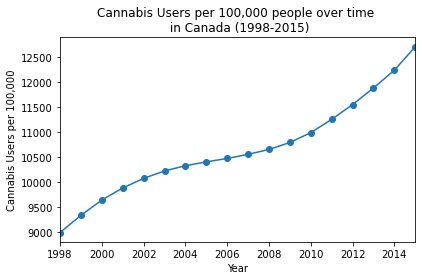

In [10]:
#Establish variables
x_axis = complete["Date"]
y_axis = complete["Cannabis Users per 100,000"]

#Create scatter plot
plt.plot(x_axis, y_axis, marker="o")
plt.title("Cannabis Users per 100,000 people over time \n in Canada (1998-2015)")
plt.xlabel("Year")
plt.ylabel("Cannabis Users per 100,000")
plt.tight_layout()
plt.xlim(1998,2015)
plt.savefig(os.path.join("Output", "CanUsers"), dpi=150)
plt.show()

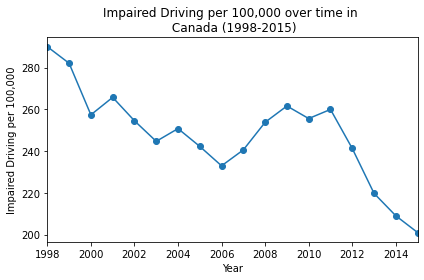

In [11]:
#Establish variables
x_axis = complete["Date"]
y_axis = complete["Impaired Driving per 100,000"]

#Create scatter plot
plt.plot(x_axis, y_axis, marker="o")
plt.title("Impaired Driving per 100,000 over time in \n Canada (1998-2015)")
plt.xlabel("Year")
plt.ylabel("Impaired Driving per 100,000")
plt.xlim(1998,2015)
plt.tight_layout()
plt.savefig(os.path.join("Output", "Impaired(2015)"), dpi=150)
plt.show()

In [12]:
#Linear regression and correlation
x_axis = complete["Cannabis Users per 100,000"]
y_axis = complete["Impaired Driving per 100,000"]

#Correlation
corr = round(sts.pearsonr(x_axis, y_axis)[0], 4)

#linear regression and line eq
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

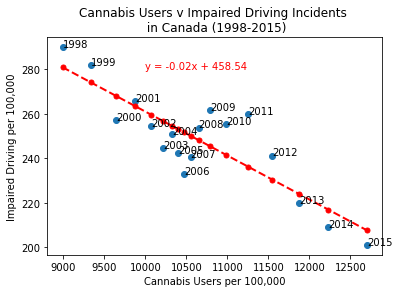

The correlation between Cannabis Users and Impaired Driving Incidents is -0.8575.


In [13]:
#Establish variables
x_axis = complete["Cannabis Users per 100,000"]
y_axis = complete["Impaired Driving per 100,000"]

#ax = complete.set_index("Cannabis Users per 100,000")["Impaired Driving per 100,000"].plot(style="o")
#Create scatter plot
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis, regress_values, color='r', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.title("Cannabis Users v Impaired Driving Incidents \n in Canada (1998-2015)")
plt.xlabel("Cannabis Users per 100,000")
plt.ylabel("Impaired Driving per 100,000")
for i, txt in enumerate(complete["Date"]):
    ax.annotate(txt, (x_axis[i], y_axis[i]))
ax.annotate(line_eq, xy=(10000, 280), fontsize=10, color="r")
plt.savefig(os.path.join("Output", "Scat-Can-Impaired"), dpi=150)
plt.show()
print(f"The correlation between Cannabis Users and Impaired Driving Incidents is {corr}.")